## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto breast_cancer_wisconsin.csv')

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
radio_B = df.loc[df['diagnosis']== 'B','radius_mean'] # B benigno
radio_M = df.loc[df['diagnosis']== 'M','radius_mean'] # M maligno
radio_B.max() - radio_B.min(), radio_M.max() - radio_M.min()

(10.869000000000002, 17.16)

Diagnostico B

In [26]:
print("El radio medio de tumores en pacientes con diagnósico B",
      '\nmedia:\t',radio_B.mean(),
      '\nmediana: ', radio_B.median(),'\nds:\t',radio_B.std(),
      '\nskew:\t',radio_B.skew())

El radio medio de tumores en pacientes con diagnósico B 
media:	 12.14652380952381 
mediana:  12.2 
ds:	 1.7805116461410389 
skew:	 -0.08379911084596789


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


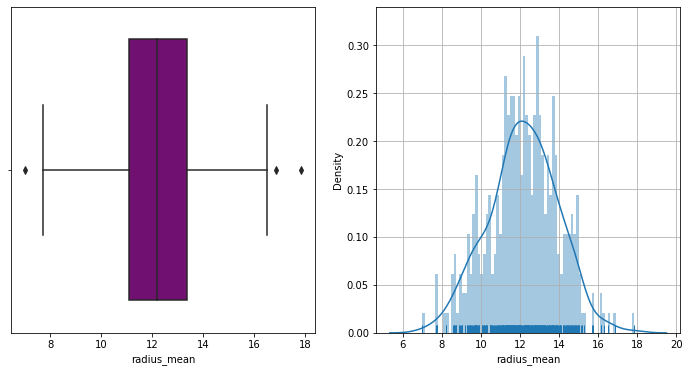

In [27]:
fig,axes=plt.subplots(1,2, figsize=(12,6))
sns.boxplot(radio_B, ax=axes[0],color='purple')
plt.grid(True)
sns.distplot(radio_B, rug=True, ax=axes[1], kde=True, norm_hist=False, bins=80) 
plt.show();

In [29]:
means_B1 = []
median_B1= []
for i in range(10_000):
    sample = radio_B.sample(n=5, replace=True)
    means_B1.append(sample.mean())
    median_B1.append(sample.median())

In [30]:
means_B2 = []
median_B2= []
for i in range(10_000):
    sample = radio_B.sample(frac=0.2, replace=True)
    means_B2.append(sample.mean())
    median_B2.append(sample.median())

In [31]:
means_B3 = []
median_B3= []
for i in range(10_000):
    sample = radio_B.sample(frac=0.9, replace=True)
    means_B3.append(sample.mean())
    median_B3.append(sample.median())

In [32]:
print(pd.Series(means_B1).skew(), pd.Series(means_B1).kurtosis())
print(pd.Series(means_B2).skew(), pd.Series(means_B2).kurtosis())
print(pd.Series(means_B3).skew(), pd.Series(means_B3).kurtosis())

-0.08187023404625385 0.058888885532797364
-0.036937414591086695 0.03796370034707319
0.0276882520625017 0.04377852144147232


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

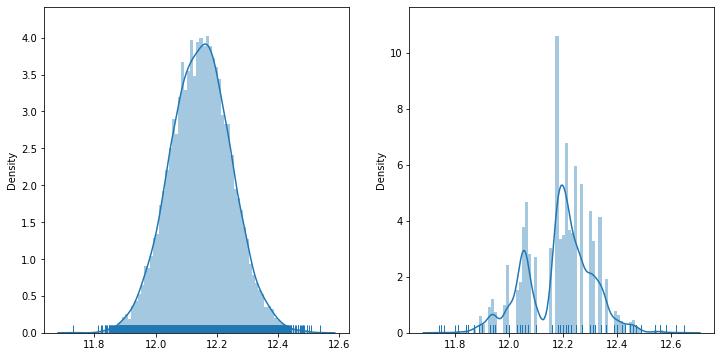

In [33]:
fig,axes=plt.subplots(1,2, figsize=(12,6))
sns.distplot(pd.Series(means_B3),rug=True,ax=axes[0], kde=True, norm_hist=False, bins=80)
sns.distplot(pd.Series(median_B3),rug=True,ax=axes[1], kde=True, norm_hist=False, bins=80)

In [46]:
print(f'Error estandar media: {pd.Series(means_B3).std()} \nError estandar mediana: {pd.Series(median_B3).std()}')

Error estandar media: 0.10025003733165136 
Error estandar mediana: 0.1208285771889494


In [47]:
print(f'Valor mínimo: {pd.Series(means_B3).min()}')
print(f'Valor máximo: {pd.Series(means_B3).max()}')
print(f'Rango: {pd.Series(means_B3).max() - pd.Series(means_B3).min()}')

Valor mínimo: 11.728672897196258
Valor máximo: 12.538894080996885
Rango: 0.8102211838006266


In [51]:
print(f'Intervalo de 95% confianza de la media: {pd.Series(means_B3).quantile(0.025)} < {radio_B.mean()} < {pd.Series(means_B3).quantile(0.975)}')

Intervalo de 95% confianza de la media: 11.951616355140187 < 12.14652380952381 < 12.346854049844238


In [53]:
mean_of_intervals_B = ((radio_B.mean() - pd.Series(means_B3).quantile(0.025)) + (pd.Series(means_B3).quantile(0.975) - radio_B.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {radio_B.mean()} +/- {mean_of_intervals_B}')

Intervalo de 95% confianza de la media: 12.14652380952381 +/- 0.19761884735202528


Diagnostico M

In [34]:
print("El radio medio de tumores en pacientes con diagnósico M",
      '\nmedia:\t',radio_M.mean(),
      '\nmediana: ',radio_M.median(),'\nds:\t',radio_M.std(),
      '\nskew:\t',radio_M.skew())

El radio medio de tumores en pacientes con diagnósico M 
media:	 17.46283018867925 
mediana:  17.325000000000003 
ds:	 3.2039711007793663 
skew:	 0.5019020231808634


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


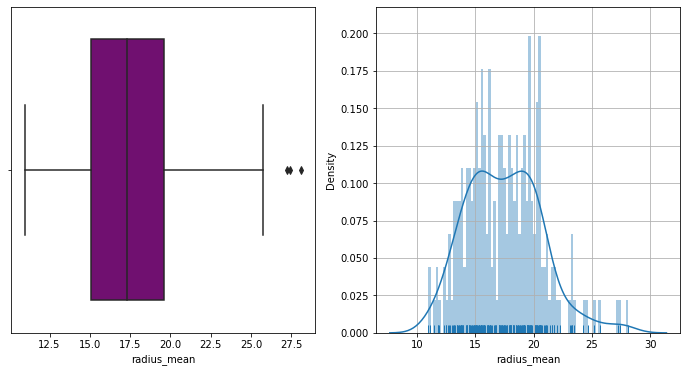

In [54]:
fig,axes=plt.subplots(1,2, figsize=(12,6))
sns.boxplot(radio_M, ax=axes[0],color='purple')
plt.grid(True)
sns.distplot(radio_M,rug=True,ax=axes[1], kde=True, norm_hist=False, bins=80)
plt.show();

In [36]:
means_M1 = []
median_M1= []
for i in range(10_000):
    sample = radio_M.sample(n=5, replace=True)
    means_M1.append(sample.mean())
    median_M1.append(sample.median())

In [37]:
means_M2 = []
median_M2= []
for i in range(10_000):
    sample = radio_M.sample(frac=0.2, replace=True)
    means_M2.append(sample.mean())
    median_M2.append(sample.median())

In [38]:
means_M3 = []
median_M3= []
for i in range(10_000):
    sample = radio_M.sample(frac=0.9, replace=True)
    means_M3.append(sample.mean())
    median_M3.append(sample.median())

In [39]:
print(pd.Series(means_M1).skew(), pd.Series(means_M1).kurtosis())
print(pd.Series(means_M2).skew(), pd.Series(means_M2).kurtosis())
print(pd.Series(means_M3).skew(), pd.Series(means_M3).kurtosis())

0.23986402674085164 0.120622419925005
0.09225765826041782 -0.046607524065554795
0.03059632316684743 0.08043316333653827


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

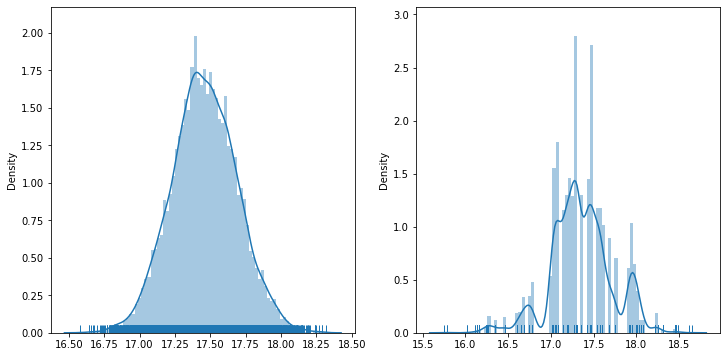

In [40]:
fig,axes=plt.subplots(1,2, figsize=(12,6))
sns.distplot(pd.Series(means_M3),rug=True,ax=axes[0], kde=True, norm_hist=False, bins=80)
sns.distplot(pd.Series(median_M3),rug=True,ax=axes[1], kde=True, norm_hist=False, bins=80)

In [42]:
print(f'Error estandar media: {pd.Series(means_M3).std()} \nError estandar mediana: {pd.Series(median_M3).std()}')

Error estandar media: 0.2311218849453343 
Error estandar mediana: 0.35433611642667134


In [48]:
print(f'Valor mínimo: {pd.Series(means_M3).min()}')
print(f'Valor máximo: {pd.Series(means_M3).max()}')
print(f'Rango: {pd.Series(means_M3).max() - pd.Series(means_M3).min()}')

Valor mínimo: 16.578795811518333
Valor máximo: 18.315392670157063
Rango: 1.7365968586387304


In [50]:
print(f'Intervalo de 95% confianza de la media: {pd.Series(means_M3).quantile(0.025)} < {radio_M.mean()} < {pd.Series(means_M3).quantile(0.975)}')

Intervalo de 95% confianza de la media: 17.01272120418849 < 17.46283018867925 < 17.921846858638744


In [52]:
mean_of_intervals = ((radio_M.mean() - pd.Series(means_M3).quantile(0.025)) + (pd.Series(means_M3).quantile(0.975) - radio_M.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {radio_M.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 17.46283018867925 +/- 0.45456282722512675
